In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score



In [2]:
train = pd.read_csv('/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/social_network_ads_train.csv')
test = pd.read_csv('/Users/vaibhavrangan/Downloads/Stat_303-2/Datasets/social_network_ads_test.csv')

In [3]:
# convert gender to numeric and drop userID
train['Gender'] = train['Gender'].map({'Female': 0, 'Male': 1})
test['Gender'] = test['Gender'].map({'Female': 0, 'Male': 1})

train = train.drop('User ID', axis=1)
test = test.drop('User ID', axis=1)
train.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,36,33000,0
1,0,39,61000,0
2,1,36,118000,1
3,1,39,122000,1
4,0,26,118000,0


<Axes: xlabel='Gender', ylabel='count'>

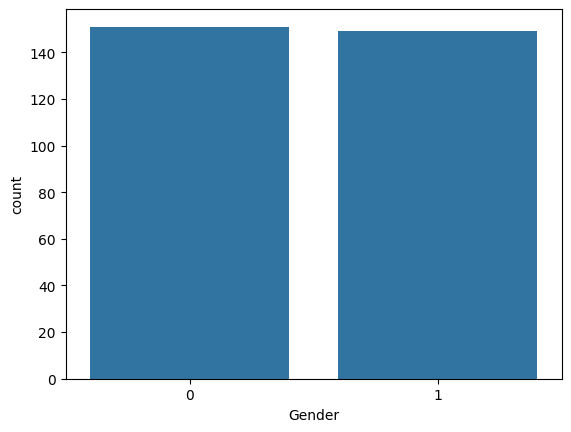

In [4]:
#gender disribution plot
sns.countplot(x='Gender', data=train)

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

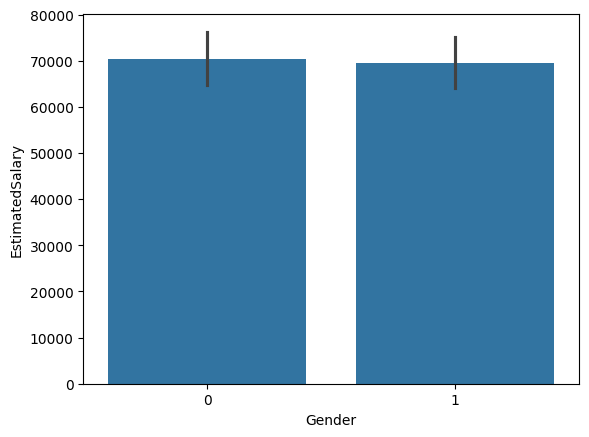

In [5]:
# plot salary against gender bar plot
sns.barplot(x='Gender', y='EstimatedSalary', data=train)

<Axes: xlabel='Gender', ylabel='Age'>

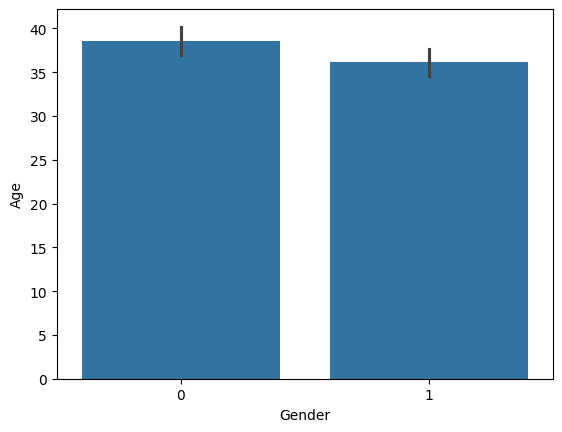

In [6]:
# gender by average age bar plot
sns.barplot(x='Gender', y='Age', data=train)

<Axes: xlabel='Purchased', ylabel='count'>

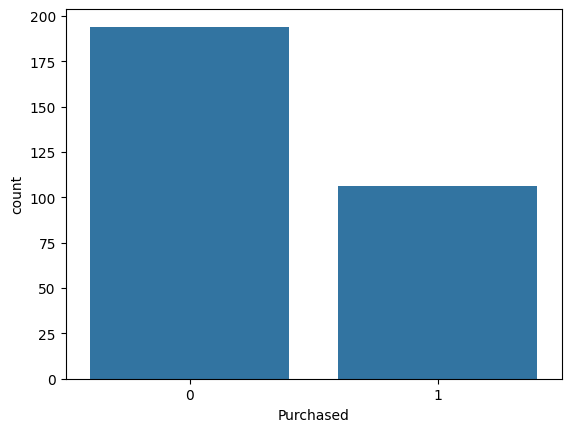

In [7]:
# count plot of purchased
sns.countplot(x='Purchased', data=train)

<Axes: xlabel='Age', ylabel='count'>

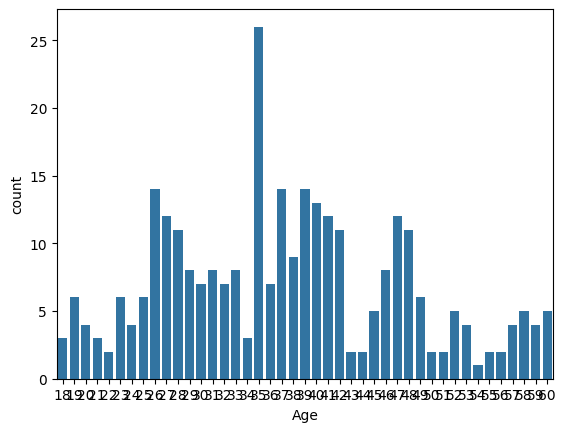

In [8]:
# age bar plot
sns.countplot(x='Age', data=train)

In [9]:
from sklearn.preprocessing import StandardScaler

train["Age_Bin"] = pd.cut(train["Age"], bins=5, labels=False)
test["Age_Bin"] = pd.cut(test["Age"], bins=5, labels=False)
train["Salary_Bin"] = pd.cut(train["EstimatedSalary"], bins=5, labels=False)
test["Salary_Bin"] = pd.cut(test["EstimatedSalary"], bins=5, labels=False)

scaler = StandardScaler()
train[["Age", "EstimatedSalary"]] = scaler.fit_transform(train[["Age", "EstimatedSalary"]])
test[["Age", "EstimatedSalary"]] = scaler.transform(test[["Age", "EstimatedSalary"]])

In [10]:
model = smf.logit(formula = "Purchased ~ Age + EstimatedSalary + C(Gender) + Age_Bin + Salary_Bin + Age_Bin:Salary_Bin", data = train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.261014
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            6
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                  0.5981
Time:                        23:19:30   Log-Likelihood:                -78.304
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.683e-47
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -13.9687      3.016     -4.631      0.000     -19.880      -8.057
C(Gender)[T.1]         0.6520      0.420      1.553      0.120      -0.171       1.475
Age                   -0.0223      0.958     -0.023      0.981      -1.900       1.855
EstimatedSalary        1.9493      0.976      1.998      0.046       0.037       3.862
Age_Bin                5.7285      1.184      4.840      0.000       3.409       8.048
Salary_Bin             3.4749      1.118      3.108      0.002       1.284       5.666
Age_Bin:Salary_Bin    -1.6174      0.275     -5.881      0.000      -2.156      -1.078
======================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [11]:
pred_probs = model.predict(test)
pred_labels = (pred_probs > 0.4).astype(int)

accuracy_score = accuracy_score(test.Purchased, pred_labels)
print(accuracy_score)

0.92
